In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai2.vision.all import *
from efficientnet_pytorch import EfficientNet

In [3]:
md_ef =  EfficientNet.from_pretrained('efficientnet-b4', num_classes=3)

Loaded pretrained weights for efficientnet-b4


In [4]:
path = '/home/ubuntu/crop/data_v1/train'

In [5]:
bs = 8
size = 512

In [6]:
dls = ImageDataLoaders.from_folder(path,item_tfms=Resize(size),valid_pct=0,
                                   bs=bs, num_workers=8, device=1)

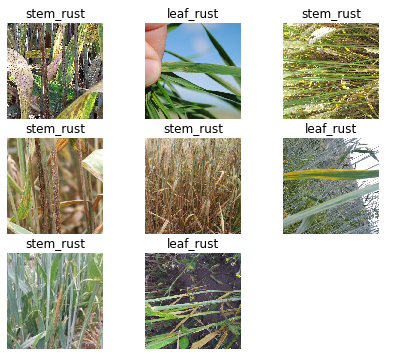

In [7]:
dls.show_batch(max_n=9, figsize=(7,6))

In [8]:
print(dls.vocab)
len(dls.vocab),dls.c

(#3) ['healthy_wheat','leaf_rust','stem_rust']


(3, 3)

In [1]:
net = resnet50(pretrained=True)

NameError: name 'resnet50' is not defined

In [9]:
learn = Learner(dls, md_ef, metrics=error_rate)

(0.0003019951749593019, 0.002511886414140463)

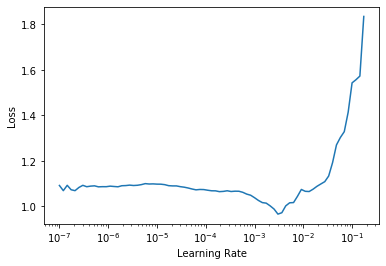

In [10]:
learn.lr_find(suggestions=True)

In [11]:
learn.fit_sgdr(2,4, 1e-3)
#learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.740142,None,None,00:35
1,0.513970,None,None,00:36
2,0.343761,None,None,00:35
3,0.252836,None,None,00:35
4,0.527666,None,None,00:35
5,0.468517,None,None,00:35
6,0.402326,None,None,00:36
7,0.294740,None,None,00:35
8,0.187611,None,None,00:35
9,0.125311,None,None,00:36


/home/ubuntu/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


(1.4454397387453355e-06, 2.5118865210060903e-07)

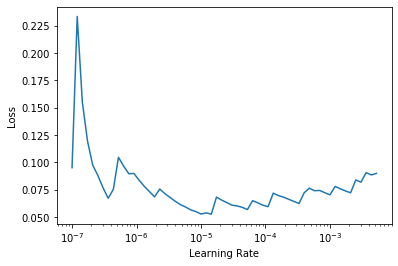

In [12]:
learn.unfreeze()
learn.lr_find(suggestions=True)

In [13]:
learn.fit_sgdr(2, 4, 1e-7)
#learn.fit_one_cycle(4, slice(1e-8))

epoch,train_loss,valid_loss,error_rate,time
0,0.064835,None,None,00:35
1,0.069205,None,None,00:34
2,0.088935,None,None,00:35
3,0.107745,None,None,00:35
4,0.084126,None,None,00:34
5,0.079566,None,None,00:35
6,0.066959,None,None,00:35
7,0.072625,None,None,00:36
8,0.076672,None,None,00:36
9,0.079251,None,None,00:36


/home/ubuntu/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [ ]:
learn.freeze()
learn.lr_find(suggestions=True)

In [ ]:
learn.fit_sgdr(2, 4, 1e-8)

In [ ]:
path = "/home/ubuntu/crop/data_v1/test"
imgs = get_image_files(path)

In [ ]:
test_dl = dls.test_dl(imgs)

In [ ]:
preds, _ = learn.get_preds(dl=test_dl) 

In [ ]:
ids = [i.split(".")[0] for i in os.listdir('/home/ubuntu/crop/data_v1/test')]

In [ ]:
submission = pd.DataFrame({'ID': ids, 'leaf_rust': preds[:,0], 'stem_rust': preds[:,1], 'healthy_wheat': preds[:,2]})

In [ ]:
for i, c in enumerate(dls.vocab):
    submission[c] = preds[:,i]

In [ ]:
submission.to_csv('/home/ubuntu/crop/submission/fasai2_eff_512_all-deep-b4-all.csv', index=False)